In [4]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(covid_data.head(3),
vaccinations_data.head(3))

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [5]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data.head(3)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [7]:
# 3.1
covid_data.sort_values(by='date')

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
4056,2020-01-22,Japan,2.0,0.0,0.0,2.0,NaN,NaN,NaN
4055,2020-01-22,Hong Kong,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4054,2020-01-22,China,547.0,17.0,28.0,502.0,NaN,NaN,NaN
4061,2020-01-22,Thailand,4.0,0.0,2.0,2.0,NaN,NaN,NaN
4060,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45506,2021-05-29,Serbia,712046.0,6844.0,0.0,705202.0,274.0,10.0,0.0
45490,2021-05-29,Peru,1947555.0,68978.0,1897522.0,-18945.0,5501.0,162.0,4728.0
45433,2021-05-29,Iran,2893218.0,79741.0,2425033.0,388444.0,7107.0,173.0,14781.0
45523,2021-05-29,Syria,24440.0,1763.0,21593.0,1084.0,30.0,5.0,5.0


In [8]:
# 3.2
vaccinations_data.sort_values(by='date')

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca


In [9]:
# 3.3
covid_df = covid_data.merge(
    vaccinations_data,
    how='left',
    on=['date', 'country'],
    )
covid_df.shape

(86785, 16)

In [10]:
# 3.4
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
covid_df.pivot_table(
    values='death_rate',
    index='country',
    aggfunc='max'
).loc['United States']

death_rate    7.189542
Name: United States, dtype: float64

In [11]:
# 3.5
covid_df.pivot_table(
    values='recover_rate',
    index='country'
).loc['Russia']

recover_rate    67.062735
Name: Russia, dtype: float64

# Ploting

In [12]:
# method .plot()
# args: x, y - columns by x and y
#       figsize - size of plot, (width, height)
#       kind - type of visualisation: line, bar, barh, hist, box, pie, scatter
#       grid - show grid, default is False
#       legend - show legend, default is False
#       title - title of plot
#       color - color of plot

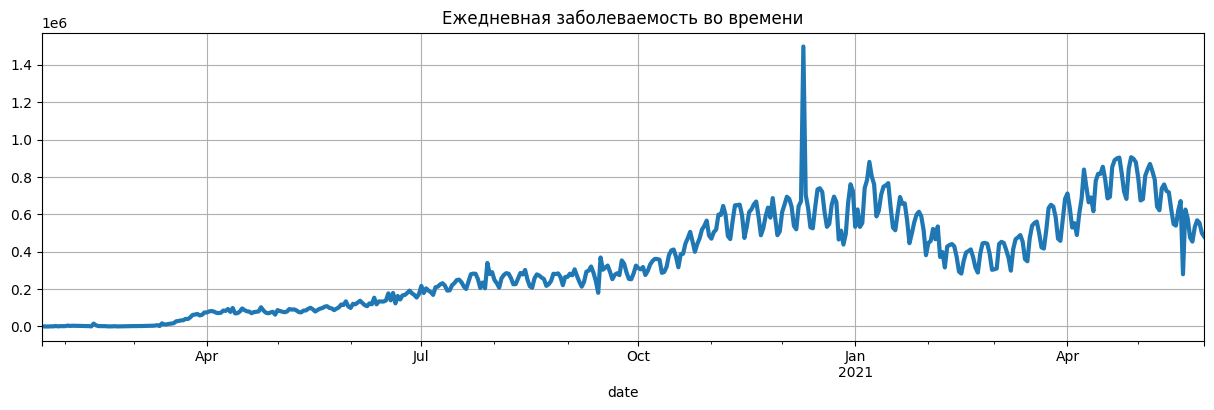

In [13]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot( # x and y sets by auto(row(x), column(y)) if plotting Series object
    kind='line',    # if DataFrame - we should set x and y 
    figsize=(15, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3 #line width
);

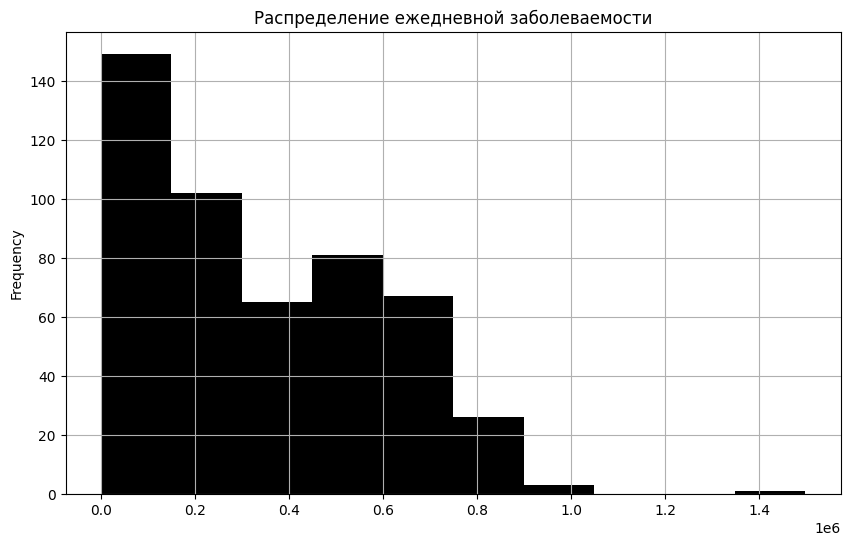

In [14]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
);

<AxesSubplot: xlabel='country'>

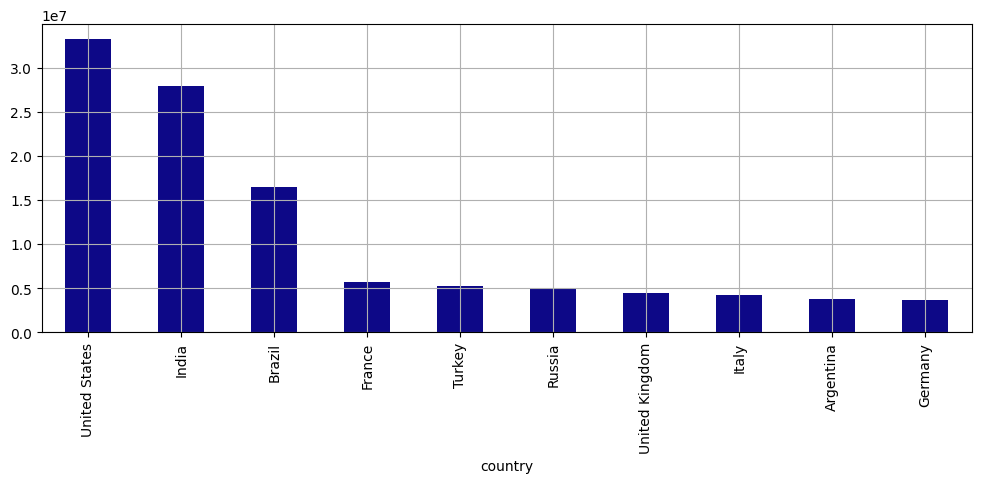

In [15]:
grouped_country = covid_df.groupby('country')['confirmed'].last().nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)

In [16]:
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country.head()

,confirmed,deaths
country,,
Afghanistan,70111.0,2899.0
Albania,132297.0,2449.0
Algeria,128456.0,3460.0
Andorra,13693.0,127.0
Angola,34180.0,757.0


<AxesSubplot: xlabel='country'>

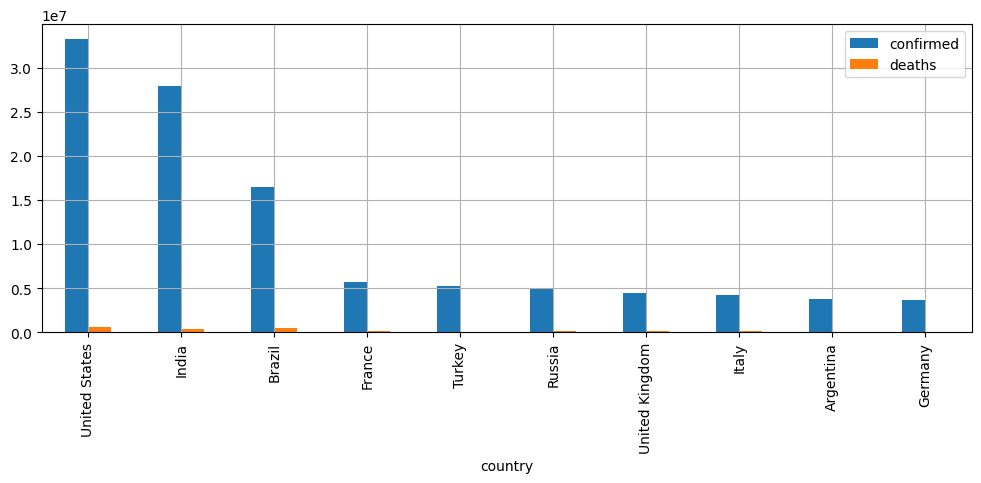

In [17]:
grouped_country = grouped_country.nlargest(10, columns='confirmed')
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
)

<AxesSubplot: xlabel='country'>

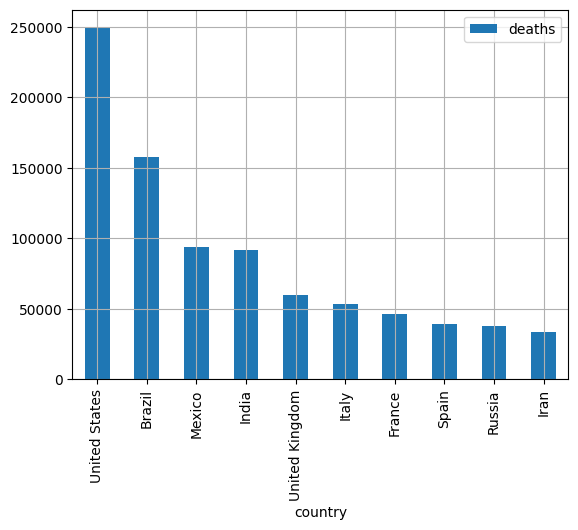

In [18]:
deaths_country = covid_df.pivot_table(
    values='deaths',
    index='country',
).nlargest(10, columns='deaths')
deaths_country.plot(
    kind='bar',
    grid=True
)

<AxesSubplot: xlabel='country'>

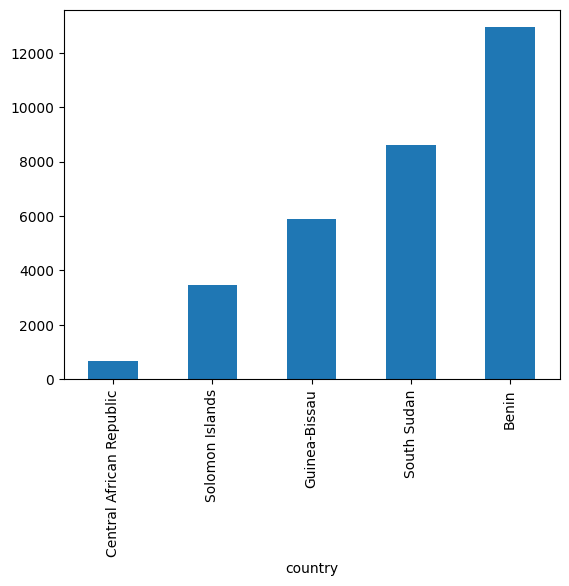

In [19]:
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

# Matplotlib

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

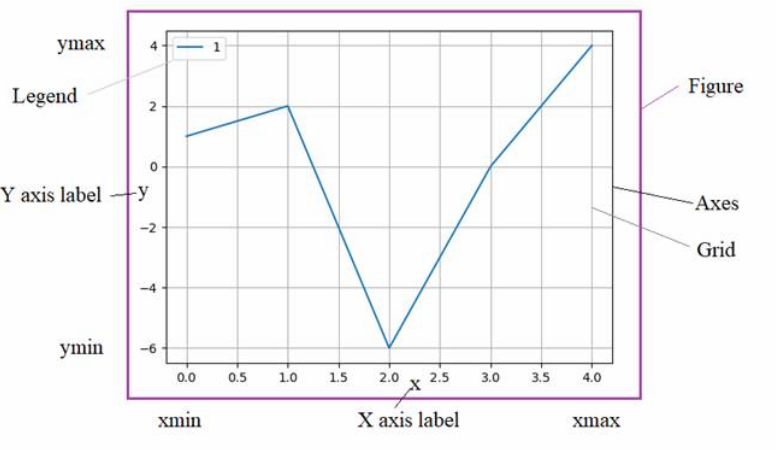

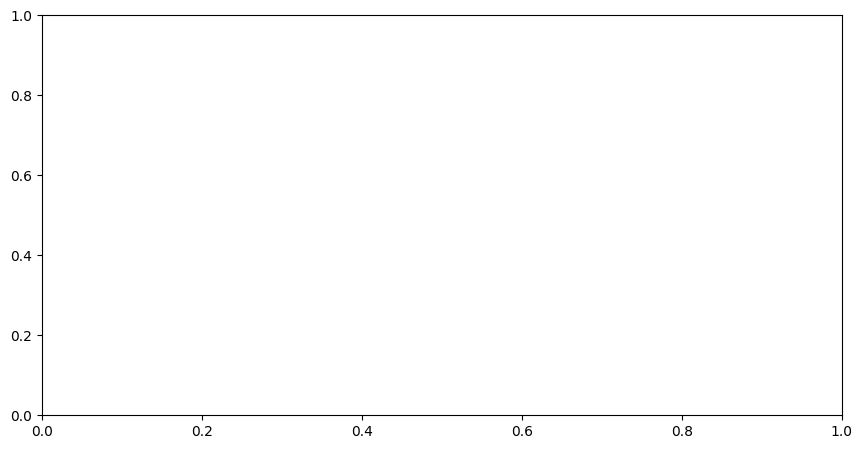

In [21]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

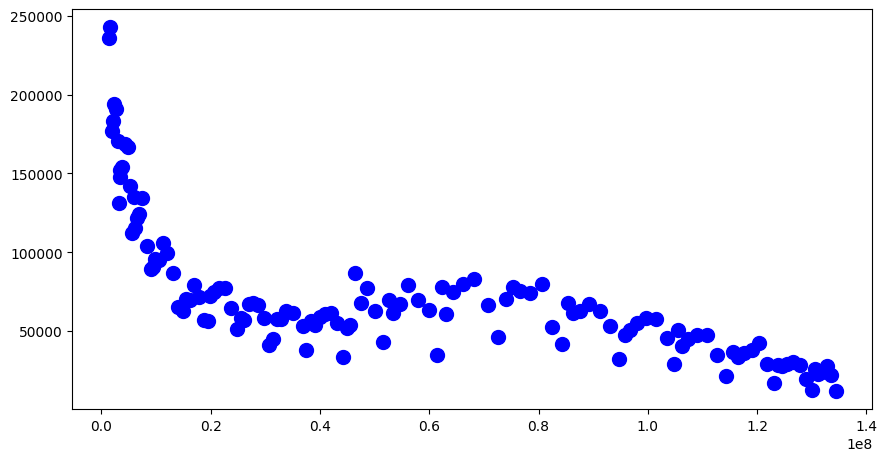

In [24]:
# scatter(), args: x,y
#                  s - size of markers
#                  marker - type of markers ('o' or '^')
#                  c - color of markers
us_data = covid_df[covid_df['country'] == 'United States']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c='blue'
)

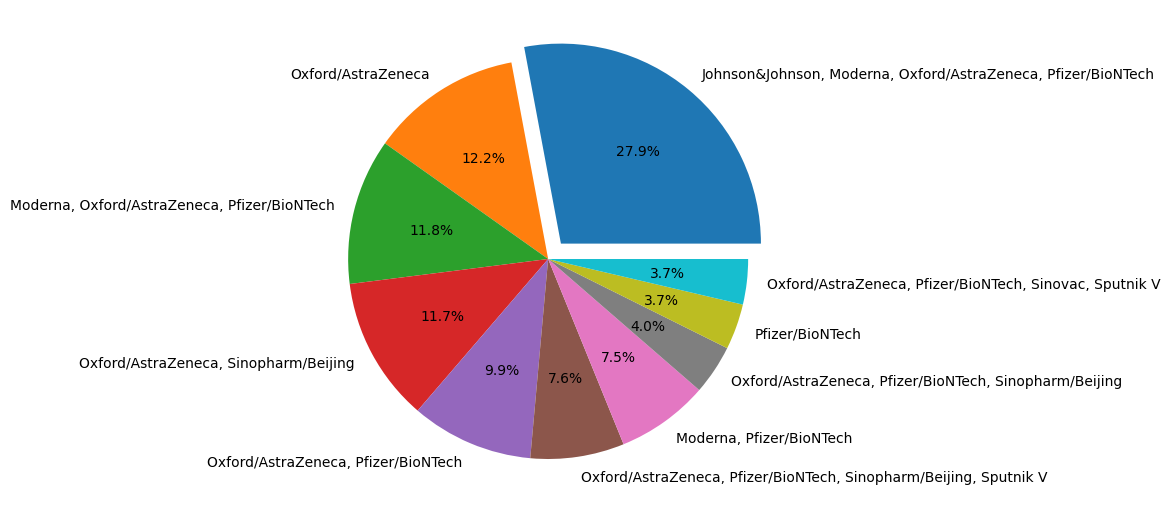

In [32]:
# pie(), args: x - values to make diagramm
#              labels - index of values
#              autopct - format of displaying, '%.1f%%' means '37.7%'
#              explode - shift sector from center
vaccine_combinations = covid_df['vaccines'].value_counts()[:10] # nlargest(10)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [36]:
# better pie
combination_not_nan = covid_df.dropna(subset='vaccines')
combination_last = combination_not_nan.groupby('country')['vaccines'].last()
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))
vaccines_dict ={}
for vaccines_list in combination_last:
    for vaccine in vaccines_list:
        if vaccine not in vaccines_dict:
            vaccines_dict[vaccine] = 1
        else:
            vaccines_dict[vaccine] += 1
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
vaccines

Oxford/AstraZeneca    149
Pfizer/BioNTech       102
Sinopharm/Beijing      66
Moderna                58
SputnikV               48
Johnson&Johnson        45
Sinovac                39
other                  24
dtype: int64

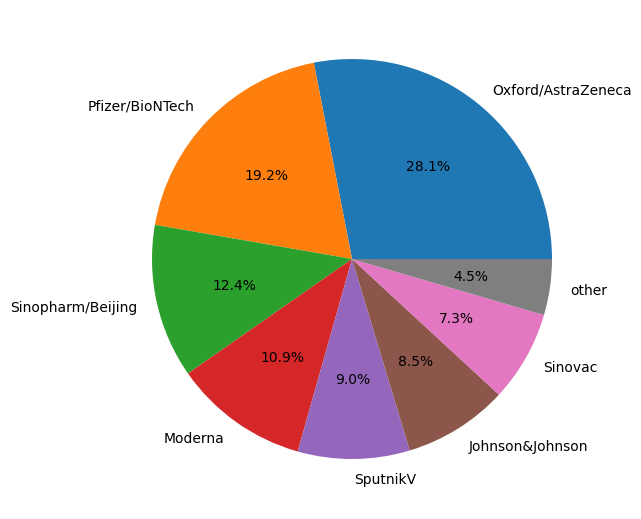

In [40]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

# Add extra info

In [ ]:
# axes.set_title() - title of diagramm
# axes.set_xlabel() / set_ylabel() - name of X/Y axis
# axes.set_xticks() / set_yticks() - marks on X/Y axis
# axes.xaxis.set_tick_params() / yaxis.set_tick_params() - parametres of X/Y axis, i.e. rotation=%degree%
# axes.legend() - legend displaying
# axes.grid() - grid displaying

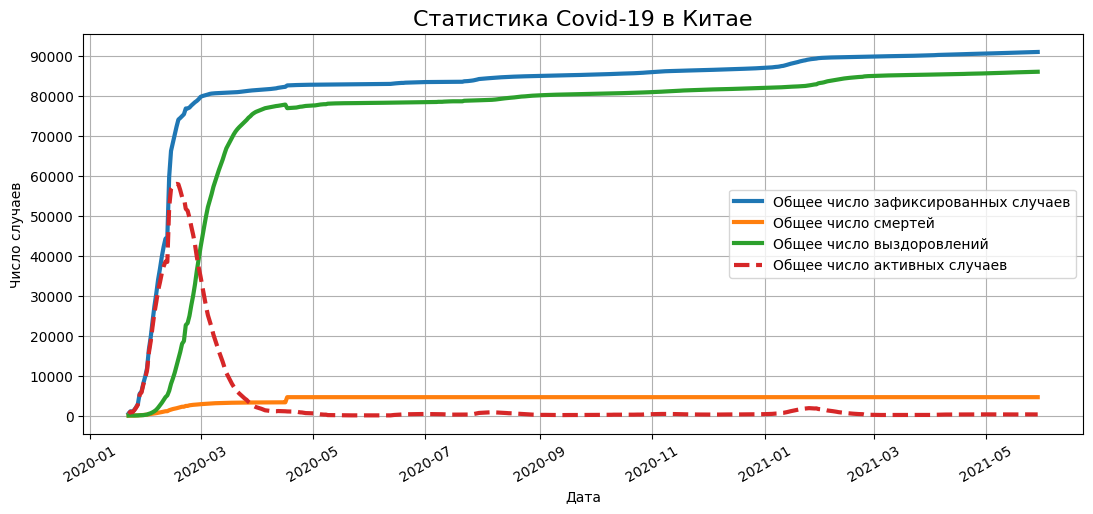

In [49]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.pivot_table(
    values=['confirmed', 'active', 'deaths', 'recovered'],
    index='date',
    aggfunc='sum'
)
# same as above, but groupby:
# china_grouped = china_data.groupby('date')[['confirmed', 'active', 'deaths', 'recovered']].sum() 
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровлений', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3,\
          linestyle='dashed')
# set parametres
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Дата')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, int(1e5), int(1e4)))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

# 2 or more axes in one figure

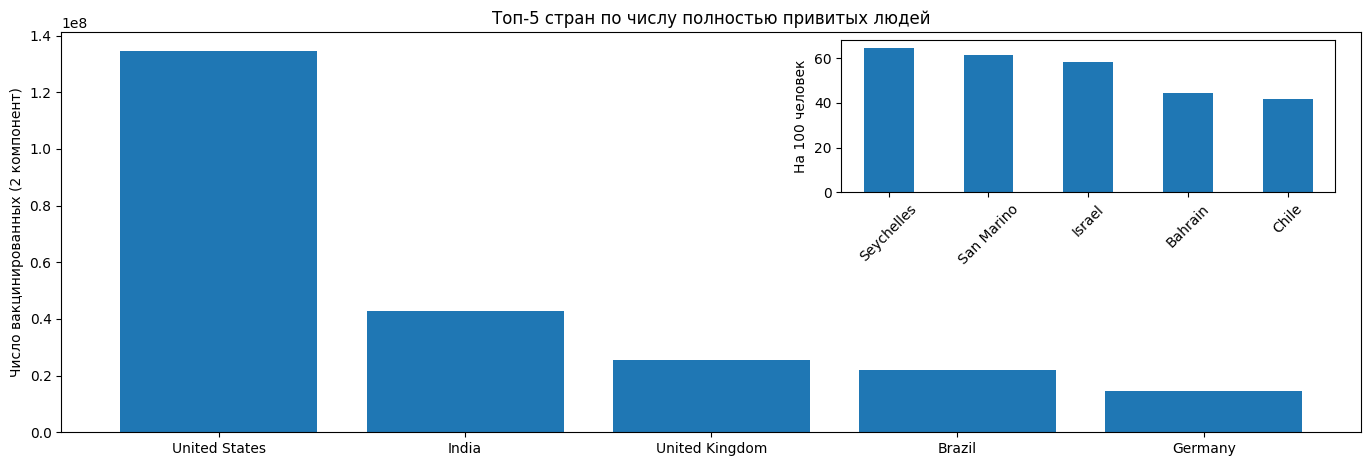

In [54]:
# method bar(), args: x
#                     height - height of bars
#                     width - width of bars
#                     color
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)
# main graphic
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vacc_country.index, height=vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ-5 стран по числу полностью привитых людей')
# extra graphic inside main
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index, height=vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

# Subplots

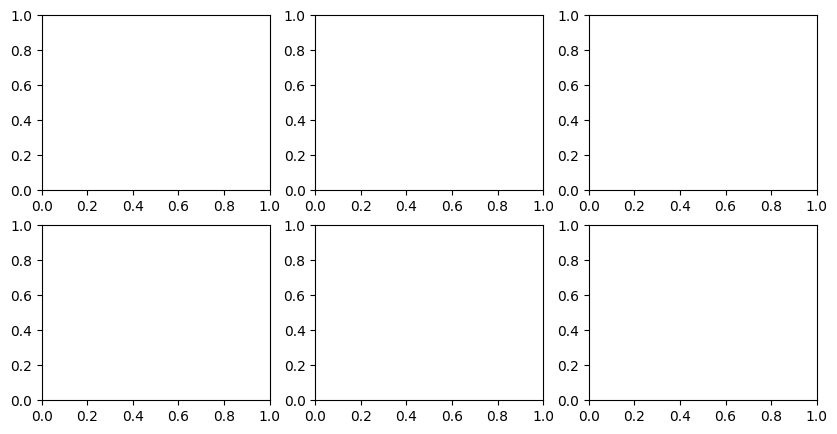

In [55]:
# method subplots(), args: nrows - num of rows
#                         ncols - num of columns
#                         figsize - size of figure, inches (width, height)
# Returns figure and list of axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

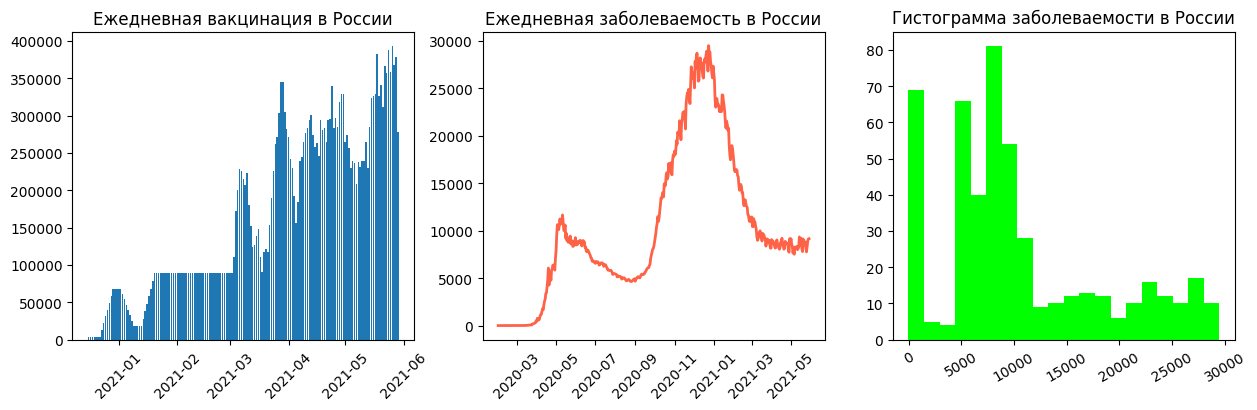

In [59]:
# hist(), args: x - list of nums to make histogramm
#               bins - num of columns(bins)
#               orientation - default if 'vertical'
#               color
russia_data = covid_df[covid_df['country'] == 'Russia']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(
    x=russia_data['daily_confirmed'],
    label='Число заболевших',
    color='lime',
    bins=20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)

# Make graphics via plt without object figure

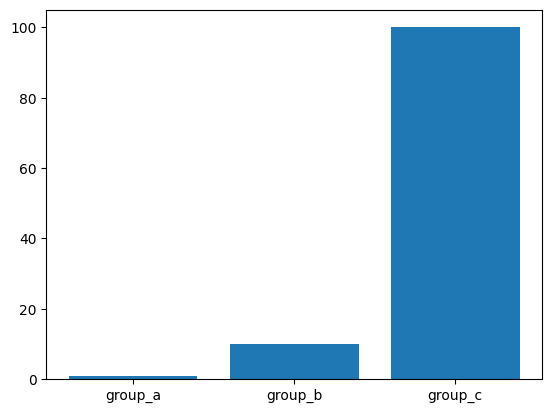

In [60]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()